<a href="https://colab.research.google.com/github/larax2do/AprendiendoIA/blob/main/3_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion no Lineal



*Apuntes de Thales @executorLarax*

En el mundo real, las generalmente los datos no son una recta, son un gusanito. Por lo cual necesitamos una funcion de mayor grado

Términos


*   $n$ = Numero de Caracteristicas
*   $m$ = Tamaño del conjunto de entrenamiento
*   $x^{(i)}$ = Vector $(i)$ del conjunto de entrenamiento con las caracteristicas
*   $x^{(i)}_j$ = $(x^{(i)})^j$ 
*   $w_j$= parametros a optomizar de la funcion Costo.


|$x_0$  | Caracteristica 1 ($x_1$) | Caracteristica 2 ($x_2$) | Caracteristica 3 ($x_3$)| ... | Caracteristica n($x_n$) | $y$ |
| -- | -- | -- | -- | -- | -- | -- | 
| 1 | $(x^{(1)})^1$ | $(x^{(1)})^2$ | $(x^{(1)})^3$ | ... | $(x^{(1)})^n$ | $y^{(1)}$ |
| 1 | $(x^{(2)})^1$ | $(x^{(2)})^2$ | $(x^{(2)})^3$ | ... | $(x^{(2)})^n$ | $y^{(2)}$ |
| 1 | $(x^{(3)})^1$ | $(x^{(3)})^2$ | $(x^{(3)})^3$ | ... | $(x^{(3)})^n$ | $y^{(3)}$ |
| $...$ | $...$ | $...$ | $...$ | ... | $...$ | $...$ |
| 1 | $(x^{(m)})^1$ | $(x^{(m)})^2$ | $(x^{(m)})^3$ | ... | $(x^{(m)})^n$ | $y^{(m)}$ |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nuestros datos estan ahora asi, como un gusanito. Ya no nos sirve(o tal vez si) un recta, necesitamos una funcion de mayor grado.

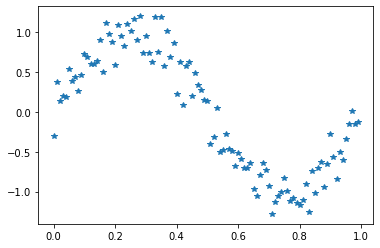

In [108]:
x_ds = np.arange(0,1,0.01)
y_ds = [ np.sin(2*i*np.pi) + np.random.normal(0,0.2) for i in x_ds]
y_pr = [ np.sin(2*i*np.pi)  for i in x_ds]

plt.plot(x_ds, y_ds, '*')
#plt.plot(x_ds, y_pr)



## Hipotesis

## Hipotesis

$h(x^{(i)})= w_0*(1)+w_1(x^{(i)})^1+w_2(x^{(i)})^2+w_3(x^{(i)})^3+...+w_n(x^{(i)})^n$

Por conveniencia $x^{(i)}_0=1$

Entonces, podemos expresar las $x's$ y los $w's$ de forma matricial

$
X^{(i)}=
\begin{bmatrix}
1&
(x^{(i)})^1&
(x^{(i)})^2&
(x^{(i)})^3&
...&
(x^{(i)})^n&
\end{bmatrix}\in \mathbb{R}^{n+1}
$


$
W=
\begin{bmatrix}
w_0&
w_1&
w_2&
w_3&
...&
w_n&
\end{bmatrix}\in \mathbb{R}^{n+1}
$

y la hipotesis expresado de forma matricial:

**$h(X^{(i)})=W^tX^{(i)}$**

In [46]:
def h(x,w):
  m = len(w)-1
  #print("h")
  #print(x)
  #print(w)
  #print("/h")
  return sum([w[0]]+[ w[j+1]*(x**(j+1)) for j in range(m)])

In [47]:
a=[[2,3,4],[1,2,3,4]]
b=[2,3,4,5]
#for i in zip(a[1],b):
#  print(i)
print(h(a[0][0],b))

64


## Funcion Costo(MSE)
$J(w_0,w_1,...,w_n) = \frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-h(x^{(i)}))^2$

In [62]:
def Costo(y,x,w):
  return sum( [ (e[0] - h(e[1],w))**2 for  e in zip(y,x) ])/(2*len(y))
  

In [64]:
a=len(x_ds)+1
w=np.random.rand(a)
Costo(y_ds,x_ds,w)

14.189979897386838

## Gradiente Descendiente

$\frac{\partial J}{w_j}  = \frac{1}{m}\sum_{i=0}^m (y^{(i)} - h(x^{(i)}))*-(x^{(i)})^j $


In [74]:
def grad(y,x,w):
  n = len(w)
  m = len(x)
  return [sum([ (e[0] - h(e[1],w))*(-e[1]**j) for e in zip(y,x)])/m for j in range(n)]
  #return [ sum([ (y[i] - hs[i])*(-x[i]**j) for i in range(n) ])/(n) for j in range(m)  ]

## Actualizacion de los parametros $w$

$w_j := w_j - \alpha\frac{\partial J}{w_j}$

In [69]:
def train(x_ds, y_ds,w, epochs, alpha):
  #w = np.random.rand(2)
  #list_error = []
  #time = []
  
  for i in range(epochs):
    Err = Costo(y_ds,x_ds,w)
    list_error.append(Err)
    time.append(i)
    
    gradiente = grad(y_ds,x_ds,w)
    for j in range(len(w)):
      w[j] = w[j] - alpha*gradiente[j]

[  0.39446362   5.05441659 -17.8599034   12.037763  ]


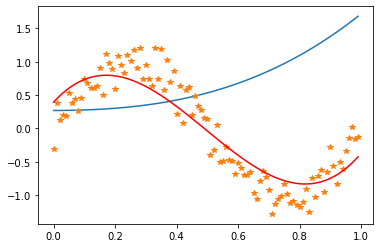

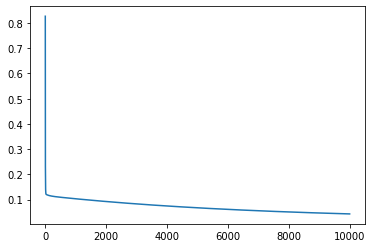

In [110]:
w = np.random.rand(4)
y_pd  = [ h(i,w) for i in x_ds ]
plt.plot(x_ds,y_pd)

time=[]
list_error=[]
train(x_ds,y_ds,w, 10000,0.7)



#print(list_error)

print(w)

plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds],color='red')
plt.show()

plt.plot(time,list_error)
plt.show()

In [107]:
print (h(10,w))

-1.3255974718903022e+19
